# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [3]:
tips = load_dataset(name='tips')

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07


In [4]:
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', data=tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [5]:
y

DesignMatrix with shape (244, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  4.71
  2.00
  3.12
  1.96
  3.23
  1.71
  5.00
  1.57
  3.00
  3.02
  3.92
  1.67
  3.71
  3.50
  3.35
  4.08
  2.75
  2.23
  7.58
  3.18
  2.34
  2.00
  2.00
  4.30
  3.00
  [214 rows omitted]
  Terms:
    'tip' (column 0)
  (to view full data, use np.asarray(this_obj))

In [6]:
# Remova as variáveis não significantes.
y, X = patsy.dmatrices(formula_like='tip ~ net_bill', data=tips)

modelo_sm1 = sm.OLS(y, X).fit()
modelo_sm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sat, 25 May 2024   Prob (F-statistic):           5.02e-23
Time:                        10:04:27   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

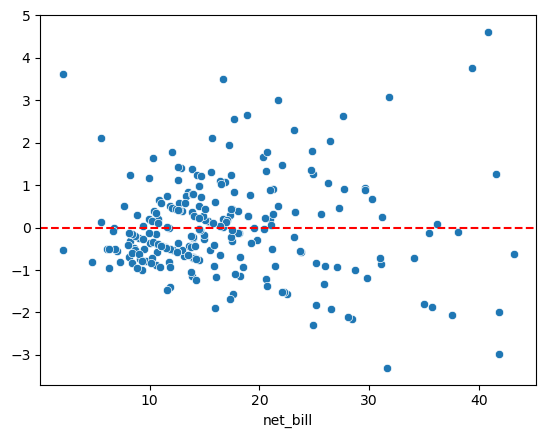

In [7]:
# Observando o gráfico de resíduos em função de net_bill
sns.scatterplot(x='net_bill', y=modelo_sm1.resid, data=tips)
plt.axhline(y=0, color='r', linestyle='--')

plt.show()

In [8]:
# Testando transformar net_bill no log e um polinômio. 
y, X = patsy.dmatrices(formula_like='tip ~ np.log(net_bill)', data=tips)

modelo_sm1_log = sm.OLS(y, X).fit()
modelo_sm1_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Sat, 25 May 2024   Prob (F-statistic):           4.40e-20
Time:                        10:04:30   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
y, X = patsy.dmatrices(formula_like='tip ~ net_bill + np.power(net_bill, 2)', 
                       data=tips)

modelo_sm1_pow = sm.OLS(y, X).fit()
modelo_sm1_pow.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Sat, 25 May 2024   Prob (F-statistic):           4.96e-22
Time:                        10:04:32   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0743      0.353      3.039      0.003       0.378       1.770
net_bill                  0.1288      0.037      3.493      0.001       0.056       0.202
np.power(net_bill, 2)    -0.0007      0.001     -0.825      0.410      -0.002       0.001
==============================================================================
Omnibus:                       39.745   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.849
Skew:                           0.830   Prob(JB):                     1.25e-17
Kurtosis:                       5.214   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
print('`modelo_sm1_log` R-squared:', round(100*modelo_sm1_log.rsquared,2),"%")
print('`modelo_sm1_pow` R-squared:', round(100*modelo_sm1_pow.rsquared,2),"%")

print("Portanto o modelo_sm1_pow é o melhor modelo por ter um R² maior com:", round(100*modelo_sm1_pow.rsquared,2),"%" )

`modelo_sm1_log` R-squared: 31.92 %
`modelo_sm1_pow` R-squared: 33.44 %
Portanto o modelo_sm1_pow é o melhor modelo por ter um R² maior com: 33.44 %


### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [11]:
y, X = patsy.dmatrices(formula_like='np.log(tip) ~ sex + smoker + time + net_bill', data=tips)

modelo_sm2 = sm.OLS(y, X).fit()
modelo_sm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Sat, 25 May 2024   Prob (F-statistic):           1.21e-18
Time:                        10:04:37   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# Removendo as variáveis não signficantes
y, X = patsy.dmatrices(formula_like='np.log(tip) ~ net_bill', data=tips)

modelo_sm2 = sm.OLS(y, X).fit()
modelo_sm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Sat, 25 May 2024   Prob (F-statistic):           2.60e-21
Time:                        10:30:48   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

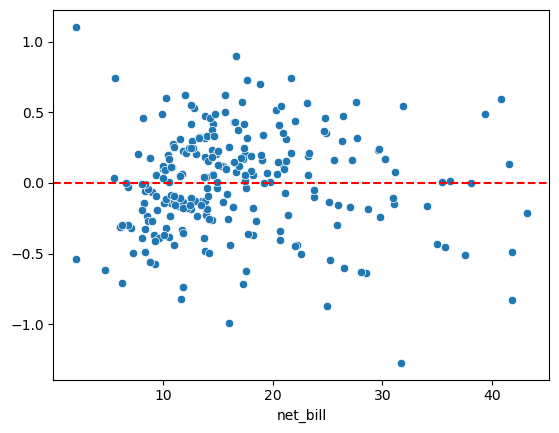

In [15]:
# Observando o gráfico de resíduos em função de net_bill
sns.scatterplot(x='net_bill', y=modelo_sm2.resid, data=tips)
plt.axhline(y=0, color='r', linestyle='--')

plt.show()

In [18]:
# Teste transformar net_bill no log e um polinômio
y, X = patsy.dmatrices(formula_like='np.log(tip) ~ np.log(net_bill)', data=tips)

modelo_sm2_log = sm.OLS(y, X).fit()
modelo_sm2_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sat, 25 May 2024   Prob (F-statistic):           5.62e-22
Time:                        10:42:35   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)     0.5151      0.048     10.652      0.000       0.420       0.610
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
y, X= patsy.dmatrices(formula_like='np.log(tip) ~ net_bill + np.power(net_bill,2)', data=tips)

modelo_sm2_pow = sm.OLS(y, X).fit()
modelo_sm2_pow.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     61.39
Date:                Sat, 25 May 2024   Prob (F-statistic):           2.82e-22
Time:                        10:42:52   Log-Likelihood:                -93.026
No. Observations:                 244   AIC:                             192.1
Df Residuals:                     241   BIC:                             202.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.1887      0.111      1.698      0.091      -0.030       0.408
net_bill                  0.0655      0.012      5.642      0.000       0.043       0.088
np.power(net_bill, 2)    -0.0008      0.000     -3.129      0.002      -0.001      -0.000
==============================================================================
Omnibus:                        5.692   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                7.934
Skew:                          -0.100   Prob(JB):                       0.0189
Kurtosis:                       3.860   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
print('`modelo_sm2_log` R-squared:', round(100*modelo_sm2_log.rsquared,2),"%")
print('`modelo_sm2_pow` R-squared:', round(100*modelo_sm2_pow.rsquared,2),"%")

print("Portanto o modelo_sm2_pow é o melhor modelo por ter um R² maior com:", round(100*modelo_sm2_pow.rsquared,2),"%" )

`modelo_sm2_log` R-squared: 31.92 %
`modelo_sm2_pow` R-squared: 33.75 %
Portanto o modelo_sm2_pow é o melhor modelo por ter um R² maior com: 33.75 %


In [48]:
# Calculando o  R² na escala de tip (sem o log) e comparando com o modelo do item 1


tips['pred_tip_log'] = np.exp(modelo_sm2_log.fittedvalues)
print('`modelo_sm2_log` R-squared:', tips[['pred_tip_log', 'tip']].corr().iloc[0,1]**2)

tips['pred_tip_pow'] = np.exp(modelo_sm2_pow.fittedvalues)
print('`modelo_sm2_pow` R-squared:', tips[['pred_tip_pow', 'tip']].corr().iloc[0,1]**2)

print('O modelo modelo_sm2_log obteve o resultado inferior, com', round(100*tips[['pred_tip_pow', 'tip']].corr().iloc[0,1]**2,2),'% de coeficiente de determinação em comparação com o modelo modelo_sm1_pow que obteve o resultado de',round(100*modelo_sm1_pow.rsquared,2),"%")

`modelo_sm2_log` R-squared: 0.32837743855275575
`modelo_sm2_pow` R-squared: 0.3290849111468202
O modelo modelo_sm2_log obteve o resultado inferior, com 32.91 % de coeficiente de determinação em comparação com o modelo modelo_sm1_pow que obteve o resultado de 33.44 %


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [118]:
filepath = 'https://raw.githubusercontent.com/rhatiro/Curso_EBAC-Profissao_Cientista_de_Dados/main/Mo%CC%81dulo%2012%20-%20Regressa%CC%83o%20I/database/previsao_de_renda.csv'

filepath = 'https://raw.githubusercontent.com/Jefersonfranca/EBAC_Curso_Cientista_de_Dados/main/Mo%CC%81dulo%2012%20Regressa%CC%83o%20I%20/database/previsao_de_renda.csv'

previsao_de_renda = pd.read_csv(filepath, index_col=0)
previsao_de_renda

#previsao_de_renda = pd.read_csv('previsao_de_renda1.csv')
#previsao_de_renda



HTTPError: HTTP Error 404: Not Found